## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
#for lr in LEARNING_RATE:
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5

Epoch 49/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.6620 - accuracy: 0.7620 - val_loss: 1.9312 - val_accuracy: 0.5034
Epoch 50/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.6714 - accuracy: 0.7563 - val_loss: 2.4241 - val_accuracy: 0.4522
Experiment with LR = 0.100000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________

Epoch 47/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.1139 - accuracy: 0.5997 - val_loss: 1.7758 - val_accuracy: 0.4504
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1135 - accuracy: 0.6010 - val_loss: 1.7212 - val_accuracy: 0.4696
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1076 - accuracy: 0.6035 - val_loss: 1.6738 - val_accuracy: 0.4786
Epoch 50/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1022 - accuracy: 0.6038 - val_loss: 1.6873 - val_accuracy: 0.4715
Experiment with LR = 0.100000, Momentum = 0.95
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________

Epoch 45/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3037 - accuracy: 0.1013 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3042 - accuracy: 0.0990 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3040 - accuracy: 0.1004 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3045 - accuracy: 0.0978 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.3043 - accuracy: 0.0997 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3039 - accuracy: 0.0985 - val_loss: 2.3045 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99
Model: "model_1"
________________________________________________

50000/50000 [==============================] - 4s 74us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 76us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 78us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 76us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 72us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 80us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Experiment with LR

50000/50000 [==============================] - 4s 71us/step - loss: 0.9426 - accuracy: 0.6679 - val_loss: 1.3739 - val_accuracy: 0.5386
Epoch 43/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.9331 - accuracy: 0.6732 - val_loss: 1.4800 - val_accuracy: 0.5044
Epoch 44/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.9177 - accuracy: 0.6789 - val_loss: 1.3700 - val_accuracy: 0.5349
Epoch 45/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.9004 - accuracy: 0.6841 - val_loss: 1.5109 - val_accuracy: 0.5030
Epoch 46/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8933 - accuracy: 0.6882 - val_loss: 1.4655 - val_accuracy: 0.5056
Epoch 47/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8825 - accuracy: 0.6898 - val_loss: 1.5581 - val_accuracy: 0.5100
Epoch 48/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8615 - accuracy: 0.6976 - val_loss: 1.4867

Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.5895 - accuracy: 0.7905 - val_loss: 1.6334 - val_accuracy: 0.5363
Epoch 41/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.5677 - accuracy: 0.8005 - val_loss: 1.7794 - val_accuracy: 0.5072
Epoch 42/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.5561 - accuracy: 0.8033 - val_loss: 1.7379 - val_accuracy: 0.5237
Epoch 43/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.5357 - accuracy: 0.8108 - val_loss: 1.7057 - val_accuracy: 0.5300
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.5246 - accuracy: 0.8140 - val_loss: 1.7593 - val_accuracy: 0.5390
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.4937 - accuracy: 0.8253 - val_loss: 1.8345 - val_accuracy: 0.5046
Epoch 46/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.4906 - accuracy: 0.8268 - val_

Epoch 38/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.5573 - accuracy: 0.7980 - val_loss: 1.7910 - val_accuracy: 0.5182
Epoch 39/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.5237 - accuracy: 0.8092 - val_loss: 1.8291 - val_accuracy: 0.5310
Epoch 40/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.5011 - accuracy: 0.8210 - val_loss: 2.0142 - val_accuracy: 0.5127
Epoch 41/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.5017 - accuracy: 0.8185 - val_loss: 1.9585 - val_accuracy: 0.5356
Epoch 42/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.4805 - accuracy: 0.8263 - val_loss: 1.8932 - val_accuracy: 0.5344
Epoch 43/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.4563 - accuracy: 0.8355 - val_loss: 2.1842 - val_accuracy: 0.5165
Epoch 44/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.4426 - accuracy: 0.8414 - val_

Epoch 36/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.8904 - accuracy: 0.6791 - val_loss: 1.6348 - val_accuracy: 0.5051
Epoch 37/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.8649 - accuracy: 0.6887 - val_loss: 1.6886 - val_accuracy: 0.5010
Epoch 38/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.8516 - accuracy: 0.6946 - val_loss: 1.7655 - val_accuracy: 0.5039
Epoch 39/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.8369 - accuracy: 0.6989 - val_loss: 1.8393 - val_accuracy: 0.4896
Epoch 40/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8498 - accuracy: 0.6953 - val_loss: 1.7814 - val_accuracy: 0.4978
Epoch 41/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8488 - accuracy: 0.6959 - val_loss: 1.7449 - val_accuracy: 0.4959
Epoch 42/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8270 - accuracy: 0.7045 - val_

Epoch 34/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5303 - accuracy: 0.4667 - val_loss: 1.5420 - val_accuracy: 0.4564
Epoch 35/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5241 - accuracy: 0.4705 - val_loss: 1.5451 - val_accuracy: 0.4540
Epoch 36/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5183 - accuracy: 0.4713 - val_loss: 1.5365 - val_accuracy: 0.4588
Epoch 37/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5115 - accuracy: 0.4749 - val_loss: 1.5344 - val_accuracy: 0.4578
Epoch 38/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5062 - accuracy: 0.4758 - val_loss: 1.5275 - val_accuracy: 0.4641
Epoch 39/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5013 - accuracy: 0.4781 - val_loss: 1.5201 - val_accuracy: 0.4619
Epoch 40/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4949 - accuracy: 0.4792 - val

50000/50000 [==============================] - 4s 76us/step - loss: 1.3009 - accuracy: 0.5409 - val_loss: 1.4392 - val_accuracy: 0.4872
Epoch 32/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2897 - accuracy: 0.5453 - val_loss: 1.4088 - val_accuracy: 0.4944
Epoch 33/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.2793 - accuracy: 0.5495 - val_loss: 1.3792 - val_accuracy: 0.5082
Epoch 34/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2702 - accuracy: 0.5533 - val_loss: 1.3816 - val_accuracy: 0.5058
Epoch 35/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2618 - accuracy: 0.5559 - val_loss: 1.3755 - val_accuracy: 0.5123
Epoch 36/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2520 - accuracy: 0.5600 - val_loss: 1.3700 - val_accuracy: 0.5119
Epoch 37/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.2428 - accuracy: 0.5642 - val_loss: 1.3907

Epoch 29/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.1246 - accuracy: 0.6055 - val_loss: 1.3623 - val_accuracy: 0.5174
Epoch 30/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.1127 - accuracy: 0.6094 - val_loss: 1.3400 - val_accuracy: 0.5252
Epoch 31/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.0977 - accuracy: 0.6151 - val_loss: 1.4093 - val_accuracy: 0.5064
Epoch 32/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.0871 - accuracy: 0.6175 - val_loss: 1.3462 - val_accuracy: 0.5257
Epoch 33/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.0731 - accuracy: 0.6249 - val_loss: 1.3477 - val_accuracy: 0.5211
Epoch 34/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.0604 - accuracy: 0.6283 - val_loss: 1.3748 - val_accuracy: 0.5213
Epoch 35/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.0455 - accuracy: 0.6338 - val_

Epoch 27/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.9026 - accuracy: 0.6797 - val_loss: 1.3965 - val_accuracy: 0.5359
Epoch 28/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8853 - accuracy: 0.6842 - val_loss: 1.4277 - val_accuracy: 0.5298
Epoch 29/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.8648 - accuracy: 0.6931 - val_loss: 1.4501 - val_accuracy: 0.5269
Epoch 30/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8520 - accuracy: 0.6965 - val_loss: 1.4229 - val_accuracy: 0.5413
Epoch 31/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8389 - accuracy: 0.6996 - val_loss: 1.4475 - val_accuracy: 0.5331
Epoch 32/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8157 - accuracy: 0.7100 - val_loss: 1.4420 - val_accuracy: 0.5391
Epoch 33/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.7770 - accuracy: 0.7247 - val_

Epoch 25/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9679 - accuracy: 0.3070 - val_loss: 1.9670 - val_accuracy: 0.3046
Epoch 26/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9618 - accuracy: 0.3100 - val_loss: 1.9611 - val_accuracy: 0.3079
Epoch 27/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9560 - accuracy: 0.3129 - val_loss: 1.9554 - val_accuracy: 0.3114
Epoch 28/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9502 - accuracy: 0.3159 - val_loss: 1.9498 - val_accuracy: 0.3134
Epoch 29/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9448 - accuracy: 0.3175 - val_loss: 1.9446 - val_accuracy: 0.3158
Epoch 30/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9394 - accuracy: 0.3199 - val_loss: 1.9397 - val_accuracy: 0.3176
Epoch 31/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9344 - accuracy: 0.3215 - val_

Epoch 23/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7844 - accuracy: 0.3786 - val_loss: 1.7829 - val_accuracy: 0.3760
Epoch 24/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7783 - accuracy: 0.3801 - val_loss: 1.7774 - val_accuracy: 0.3785
Epoch 25/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7724 - accuracy: 0.3817 - val_loss: 1.7707 - val_accuracy: 0.3859
Epoch 26/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7667 - accuracy: 0.3846 - val_loss: 1.7656 - val_accuracy: 0.3873
Epoch 27/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7616 - accuracy: 0.3860 - val_loss: 1.7600 - val_accuracy: 0.3870
Epoch 28/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7561 - accuracy: 0.3884 - val_loss: 1.7549 - val_accuracy: 0.3890
Epoch 29/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7510 - accuracy: 0.3902 - val_

Epoch 21/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7304 - accuracy: 0.3968 - val_loss: 1.7283 - val_accuracy: 0.3952
Epoch 22/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7222 - accuracy: 0.3998 - val_loss: 1.7192 - val_accuracy: 0.3995
Epoch 23/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7146 - accuracy: 0.4026 - val_loss: 1.7117 - val_accuracy: 0.4036
Epoch 24/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7067 - accuracy: 0.4062 - val_loss: 1.7059 - val_accuracy: 0.4057
Epoch 25/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6995 - accuracy: 0.4083 - val_loss: 1.6975 - val_accuracy: 0.4099
Epoch 26/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6922 - accuracy: 0.4111 - val_loss: 1.6908 - val_accuracy: 0.4121
Epoch 27/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6858 - accuracy: 0.4125 - val_

Epoch 19/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.4677 - accuracy: 0.4858 - val_loss: 1.4944 - val_accuracy: 0.4736
Epoch 20/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4529 - accuracy: 0.4922 - val_loss: 1.4839 - val_accuracy: 0.4774
Epoch 21/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4398 - accuracy: 0.4958 - val_loss: 1.4715 - val_accuracy: 0.4805
Epoch 22/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4288 - accuracy: 0.5008 - val_loss: 1.4606 - val_accuracy: 0.4883
Epoch 23/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4155 - accuracy: 0.5049 - val_loss: 1.4551 - val_accuracy: 0.4881
Epoch 24/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4021 - accuracy: 0.5082 - val_loss: 1.4455 - val_accuracy: 0.4917
Epoch 25/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.3913 - accuracy: 0.5130 - val_

Epoch 17/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2618 - accuracy: 0.1606 - val_loss: 2.2603 - val_accuracy: 0.1620
Epoch 18/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2586 - accuracy: 0.1632 - val_loss: 2.2572 - val_accuracy: 0.1648
Epoch 19/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2556 - accuracy: 0.1657 - val_loss: 2.2542 - val_accuracy: 0.1672
Epoch 20/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2526 - accuracy: 0.1687 - val_loss: 2.2513 - val_accuracy: 0.1695
Epoch 21/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2497 - accuracy: 0.1710 - val_loss: 2.2485 - val_accuracy: 0.1725
Epoch 22/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2469 - accuracy: 0.1736 - val_loss: 2.2457 - val_accuracy: 0.1749
Epoch 23/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2441 - accuracy: 0.1762 - val_

50000/50000 [==============================] - 4s 77us/step - loss: 2.1788 - accuracy: 0.2248 - val_loss: 2.1734 - val_accuracy: 0.2310
Epoch 15/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1718 - accuracy: 0.2285 - val_loss: 2.1665 - val_accuracy: 0.2348
Epoch 16/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1650 - accuracy: 0.2321 - val_loss: 2.1599 - val_accuracy: 0.2391
Epoch 17/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1585 - accuracy: 0.2369 - val_loss: 2.1534 - val_accuracy: 0.2398
Epoch 18/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.1521 - accuracy: 0.2379 - val_loss: 2.1471 - val_accuracy: 0.2425
Epoch 19/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1459 - accuracy: 0.2402 - val_loss: 2.1411 - val_accuracy: 0.2443
Epoch 20/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.1398 - accuracy: 0.2437 - val_loss: 2.1351

Epoch 12/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.1568 - accuracy: 0.2522 - val_loss: 2.1525 - val_accuracy: 0.2541
Epoch 13/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1463 - accuracy: 0.2561 - val_loss: 2.1424 - val_accuracy: 0.2598
Epoch 14/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.1362 - accuracy: 0.2617 - val_loss: 2.1327 - val_accuracy: 0.2653
Epoch 15/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1265 - accuracy: 0.2660 - val_loss: 2.1232 - val_accuracy: 0.2684
Epoch 16/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1169 - accuracy: 0.2686 - val_loss: 2.1138 - val_accuracy: 0.2721
Epoch 17/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.1074 - accuracy: 0.2718 - val_loss: 2.1045 - val_accuracy: 0.2732
Epoch 18/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.0979 - accuracy: 0.2745 - 

Epoch 10/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9263 - accuracy: 0.3260 - val_loss: 1.9231 - val_accuracy: 0.3228
Epoch 11/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9121 - accuracy: 0.3293 - val_loss: 1.9096 - val_accuracy: 0.3294
Epoch 12/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8990 - accuracy: 0.3367 - val_loss: 1.8976 - val_accuracy: 0.3374
Epoch 13/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8872 - accuracy: 0.3404 - val_loss: 1.8869 - val_accuracy: 0.3385
Epoch 14/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8766 - accuracy: 0.3446 - val_loss: 1.8752 - val_accuracy: 0.3443
Epoch 15/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8660 - accuracy: 0.3499 - val_loss: 1.8654 - val_accuracy: 0.3487
Epoch 16/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8564 - accuracy: 0.3530 - val_

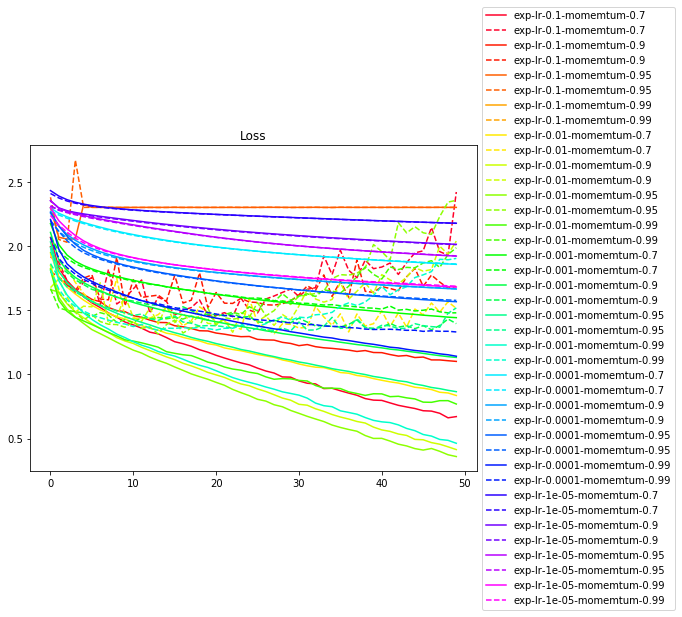

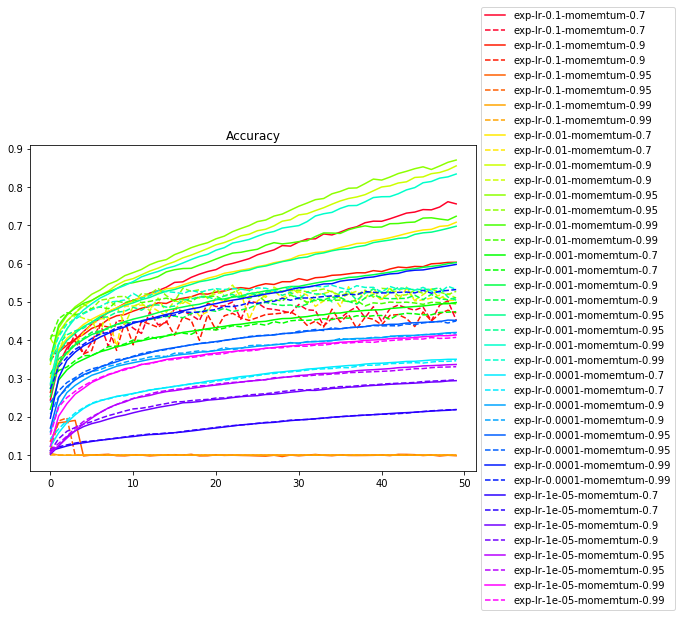

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()